# Datenvisualisierung mit

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

Als erstes: IPython interaktiv machen:

In [1]:
%matplotlib inline
# bei euch: %matplotlib (nur in iPython)

Um mit Matplotlib arbeiten zu können, muss die Bibliothek erst einmal importiert werden. Damit wir nicht so viel tippen müssen geben wir ihr einen kürzeren Namen:

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Außerdem brauchen wir ein paar Funktion aus `numpy`, die euch schon bekannt sind

In [3]:
import numpy as np

Ein einfaches Beispiel: $f(x)=x^2$

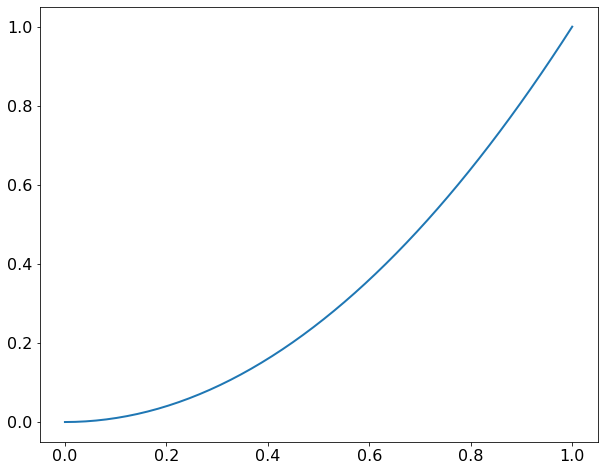

In [4]:
x = np.linspace(0, 1) # gibt 50 Zahlen in gleichmäßigem Abstand von 0–1
plt.plot(x, x**2)
# Falls nicht interaktiv: 
# plt.show()

Anderes Beispiel: $\sin(t)$ mit verschiedenen Stilen. Vorsicht, die Funktionen und $\pi$ sind Bestandteil von `numpy`

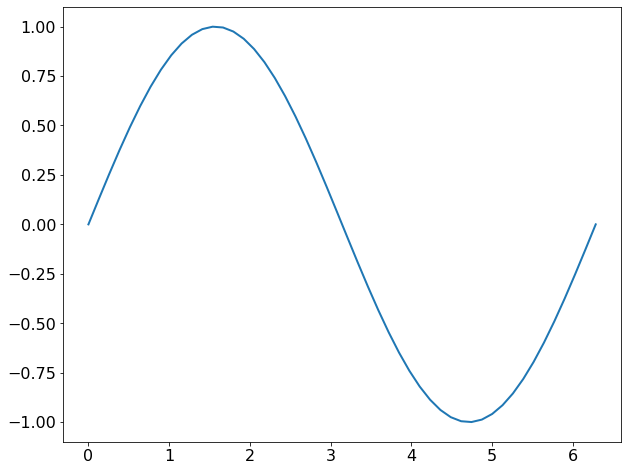

In [5]:
t = np.linspace(0, 2 * np.pi)
plt.plot(t, np.sin(t))

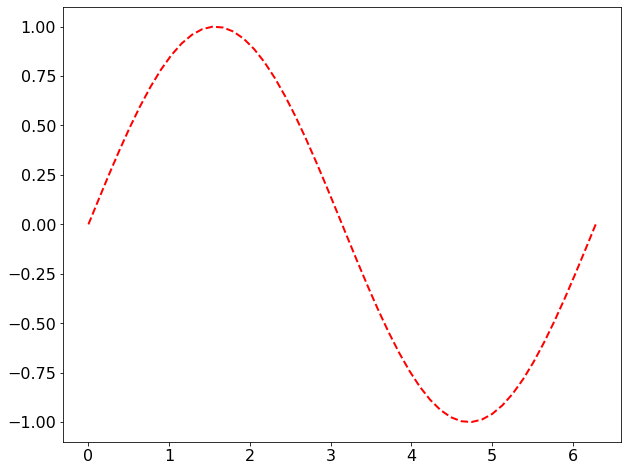

In [6]:
plt.plot(t, np.sin(t), 'r--')

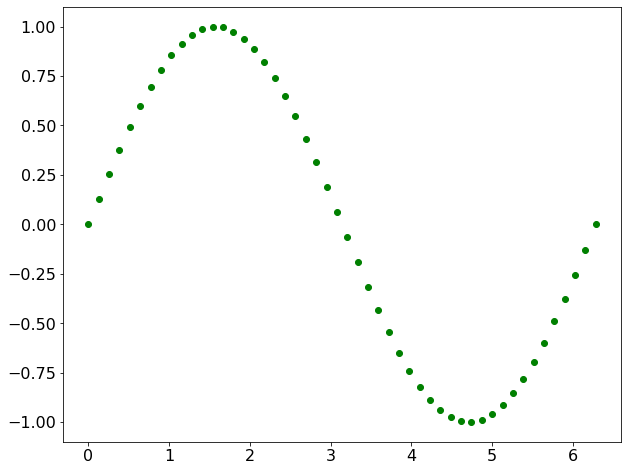

In [7]:
plt.plot(t, np.sin(t), 'go')

Tabelle mit allen Farben und Styles: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot)

Neue Grenzen mit `xlim(a, b)` und `ylim(a, b)`

(-1.2, 1.2)

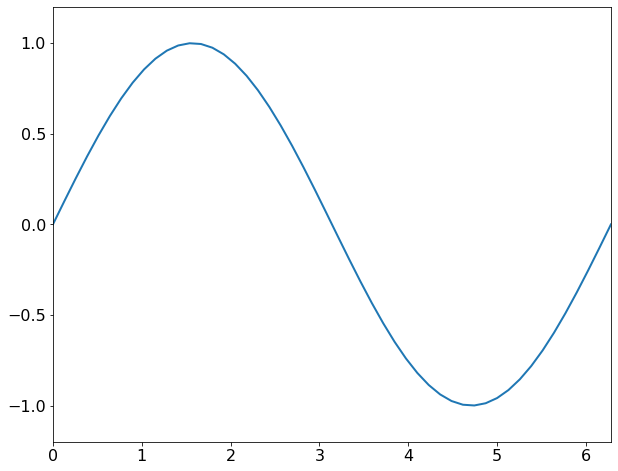

In [8]:
plt.plot(t, np.sin(t))
plt.xlim(0, 2 * np.pi)
plt.ylim(-1.2, 1.2)

## Es fehlt noch etwas...
![XKCD comic on why you should label your axes.](http://imgs.xkcd.com/comics/convincing.png "And if you labeled your axes, I could tell you exactly how MUCH better.")

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


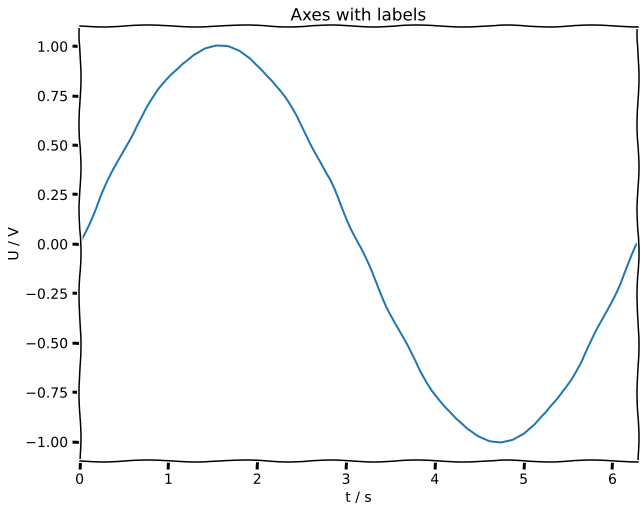

In [9]:
with plt.xkcd():
    plt.title('Axes with labels')
    plt.plot(t, np.sin(t))
    plt.xlabel('t / s')
    plt.ylabel('U / V')
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 2 * np.pi)

Achsen-Beschriftungen können mit LaTeX-Code erstellt werden → LaTeX-Kurs in der nächsten Woche.

Text(0, 0.5, '$U / \\mathrm{V}$')

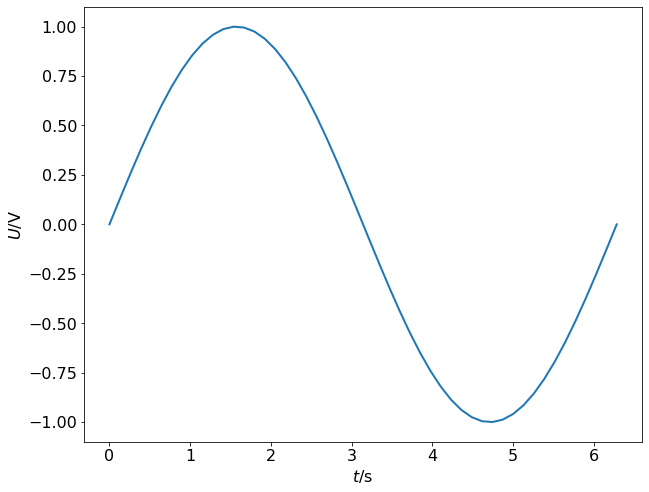

In [10]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')
plt.ylabel(r'$U / \mathrm{V}$')

## Einheiten in Achsenbeschriftungen werden wegdividiert:

Text(0, 0.5, '$U \\,/\\, \\mathrm{V}$')

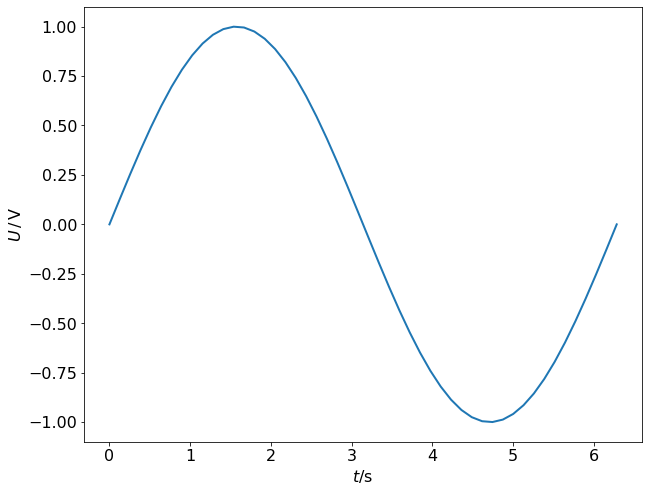

In [11]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')
plt.ylabel(r'$U \,/\, \mathrm{V}$')  # Spaces sind Geschmacksfrage……

Mehr zu Einheiten gibt es im LaTeX-Kurs.

## Legende

Legenden für Objekte die ein `label` tragen

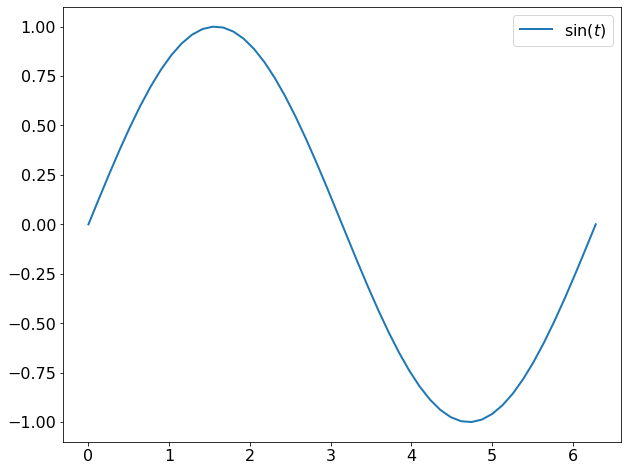

In [12]:
plt.plot(t, np.sin(t), label=r'$\sin(t)$')
plt.legend()
#plt.legend(loc='lower left')
#plt.legend(loc='best')

Seit matplotlib 2.0.2 ist `loc=best` standardmäßig eingestellt.

Andere möglche Orte für die Legende findest du hier:

https://matplotlib.org/api/legend_api.html

### Gitter

Mit `grid()` wird ein Gitter erstellt:

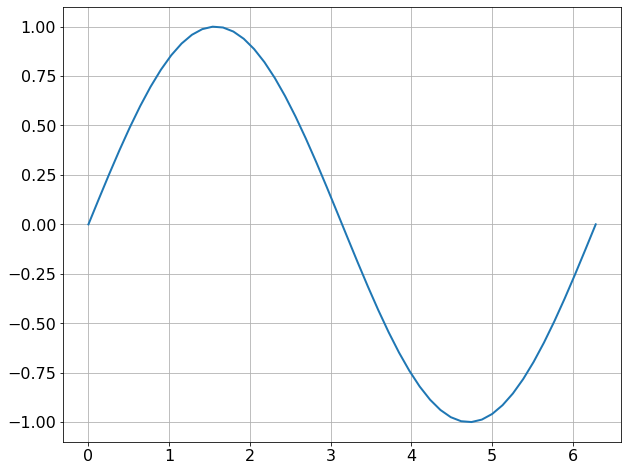

In [13]:
plt.plot(t, np.sin(t))
plt.grid()

## Laden von Daten

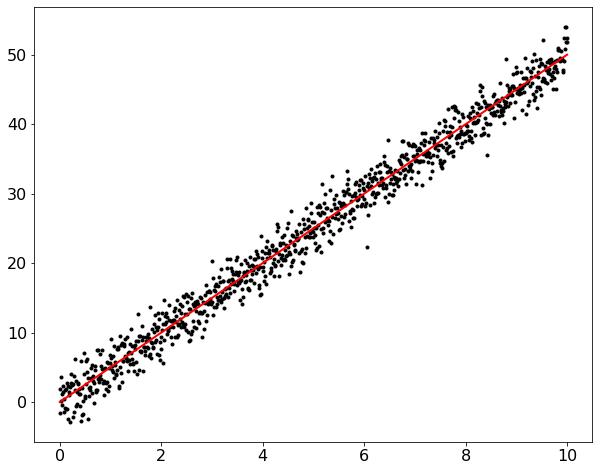

In [14]:
x, y = np.genfromtxt('data/example_data_linear.txt', unpack=True)
plt.plot(x, y, 'k.')

t = np.linspace(0, 10)
plt.plot(t, 5 * t, 'r-')

## Auslagern in ein Skript
Speichert den folgenden Code in eine Textdatei `plot.py` ab.

Öffnet ein Terminal und startet das Programm:
    
    python plot.py

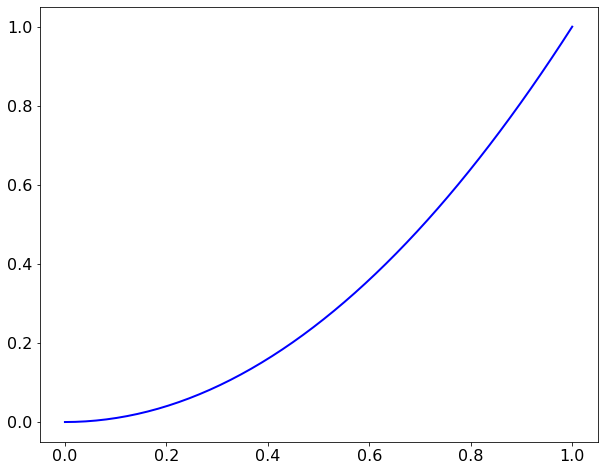

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1)
plt.plot(x, x**2, 'b-')
plt.savefig('plot.pdf')

Mit `savefig` speichert man die Abbildung.

In diesem Fall sollte die Datei `plot.pdf` erstellt worden sein.

Es gibt viele Ausgabeformate: `pdf`, `png`, `svg`, LaTeX


Um mehrere Plots zu speichern kann man `plt.clf()` verwenden. Der Befehl leert die aktuelle figure und steht für `clear figure`. 

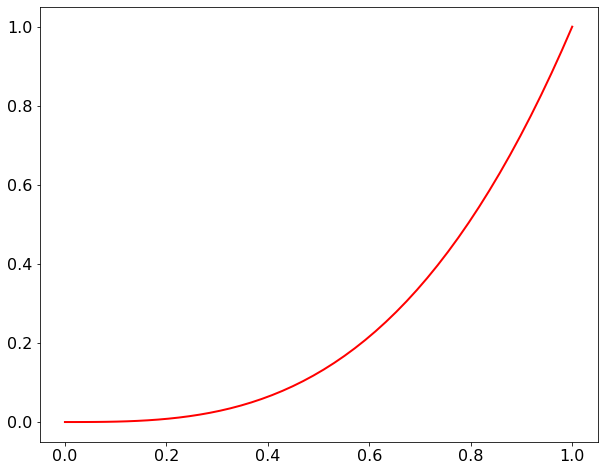

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1)

### Plot 1
plt.clf()


plt.plot(x, x**2, 'b-',label='Plot 1')
plt.legend()
plt.savefig('plot_1.pdf')

### Plot 2
plt.clf()

plt.plot(x, x**3, 'r-')
plt.savefig('plot_2.pdf')



## Komplexere Abbildungen
Natürlich kann man mehrere Linien in einen Plot packen:

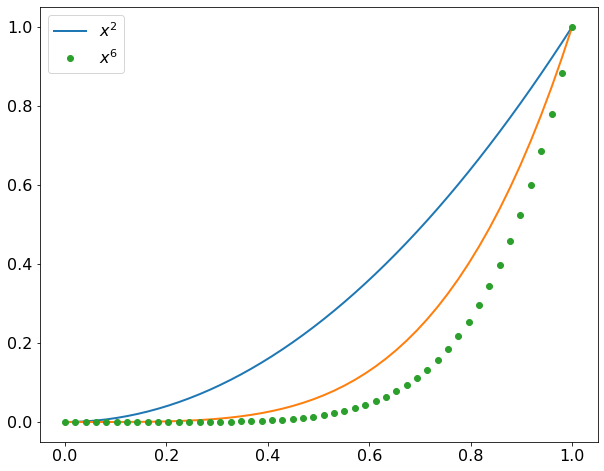

In [17]:
x = np.linspace(0, 1)

plt.plot(x, x**2, label=r'$x^2$')
plt.plot(x, x**4)
plt.plot(x, x**6, 'o', label=r'$x^6$')

plt.legend()

Es werden nur die Plots in der Legende angezeigt, die ein Label haben.

Man kann auch mehrere Plots in ein Bild packen:

(0.0, 6.283185307179586)

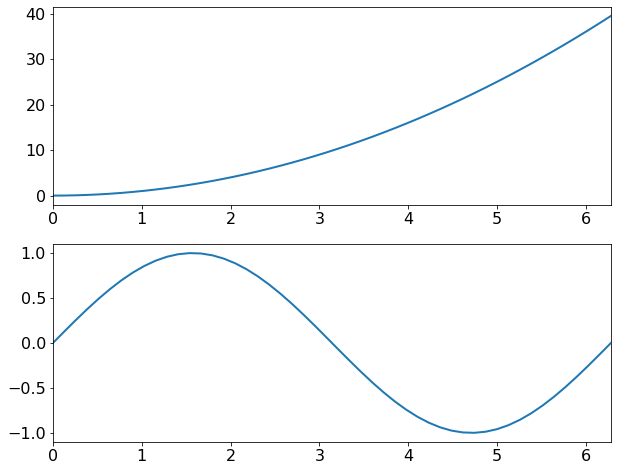

In [18]:
x = np.linspace(0, 2 * np.pi)

# #rows, #columns, plot index = row * (#cols) + col
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2 * np.pi)

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)

Dies führt manchmal zu Spacing-Problemen und Teilen die sich überschneiden, Lösung: `plt.figure(constrained_layout=True)`

Text(0.5, 1.0, '$f(x)=\\sin(x)$')

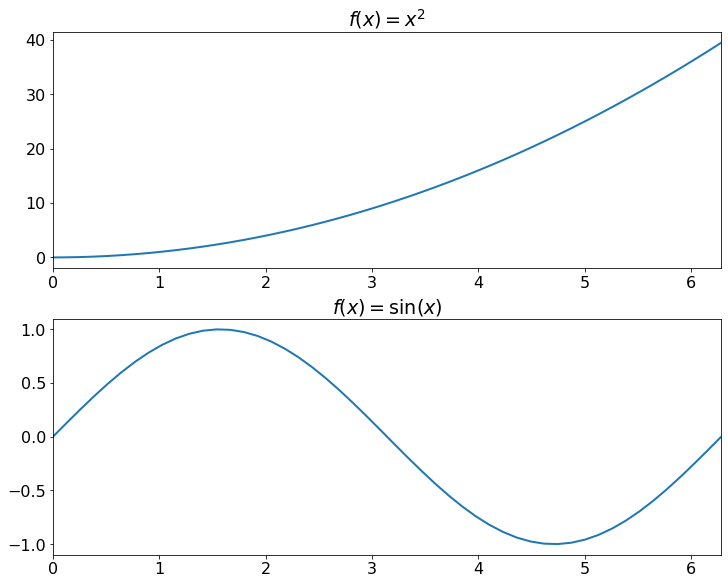

In [29]:
x = np.linspace(0, 2 * np.pi)

# Anzahl Zeile, Anzahl Spalten, Nummer des Plots
plt.figure(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2 * np.pi)
plt.title(r"$f(x)=x^2$")

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)
plt.title(r"$f(x)=\sin(x)$")

Plot im Plot:

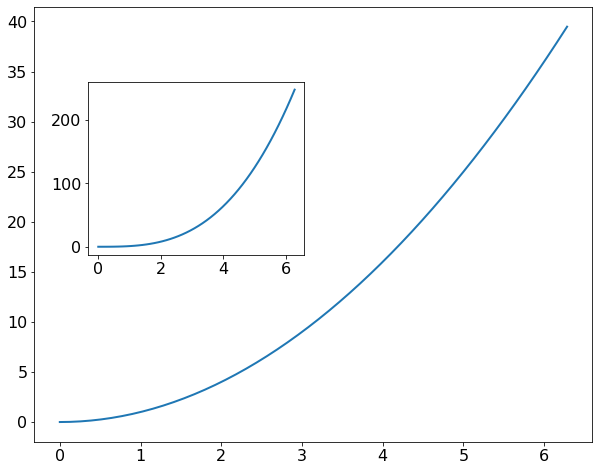

In [20]:
plt.plot(x, x**2)

# Koordinaten relativ zum Plot (0,0) links unten (1,1) rechts oben
plt.axes([0.2, 0.45, 0.3, 0.3]) 

# [x-location, y-location, x-length, y-length]

plt.plot(x, x**3)

## Plots mit Fehlerbalken
Sehr häufig werden im Praktikum Plots mit Fehlerbalken benötigt:

<ErrorbarContainer object of 3 artists>

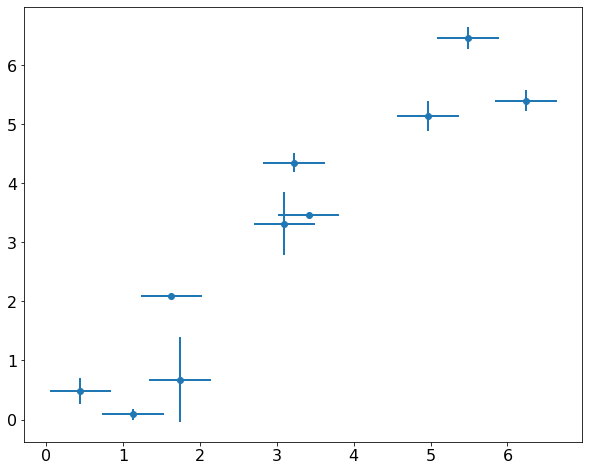

In [21]:
rng = np.random.default_rng()
x = np.linspace(0, 2 * np.pi, 10)
errX = 0.4 * rng.standard_normal(10)
errY = 0.4 * rng.standard_normal(10)

plt.errorbar(x + errX, x + errY, xerr=0.4, yerr=errY, fmt='o')

## Achsen-Skalierung
Logarithmische (oder auch andere) Skalierung der Achsen ist auch möglich:

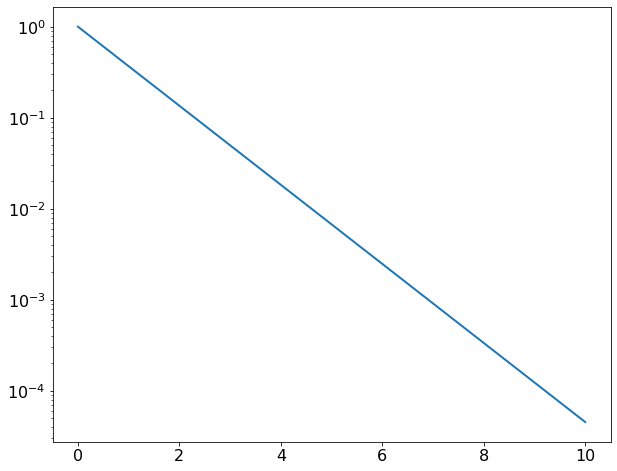

In [22]:
x = np.linspace(0, 10)

plt.plot(x, np.exp(-x))
plt.yscale('log')
#plt.xscale('log')

## Polar-Plot
Manchmal braucht man einen Polarplot:

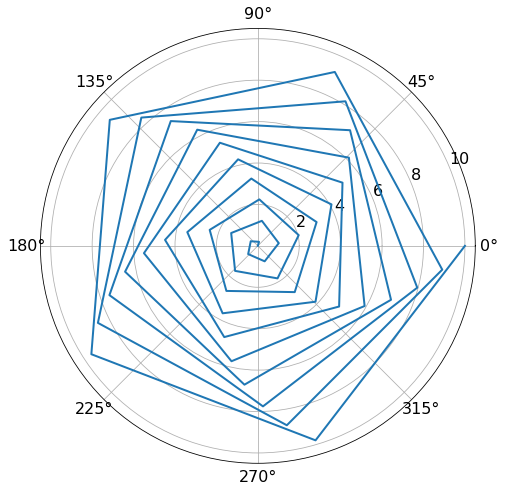

In [23]:
#r = np.linspace(0, 10, 1000)
r = np.linspace(0, 10, 50)
theta = 2 * np.pi * r

plt.polar(theta, r)

# Ticks
Man kann sehr viele Sachen mit Ticks machen…

Text(0.5, 1.0, '$\\tau$ FTW!')

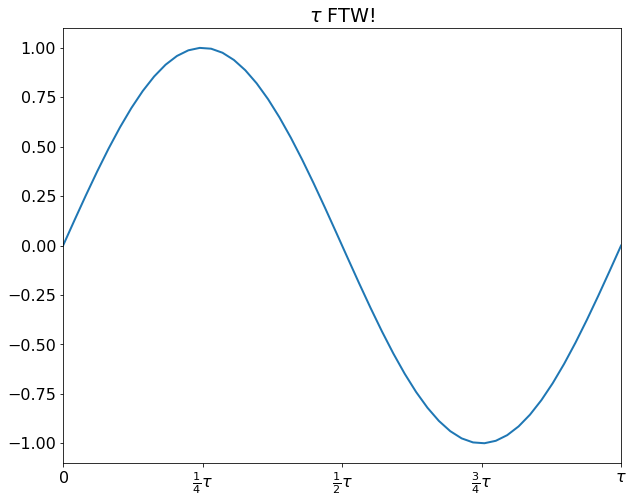

In [24]:
x = np.linspace(0, 2 * np.pi)

plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)
# erste Liste: Tick-Positionen, zweite Liste: Tick-Beschriftung
plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
           [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$", r"$\tau$"])
plt.title(r"$\tau$ FTW!")

(0.0, 11.0)

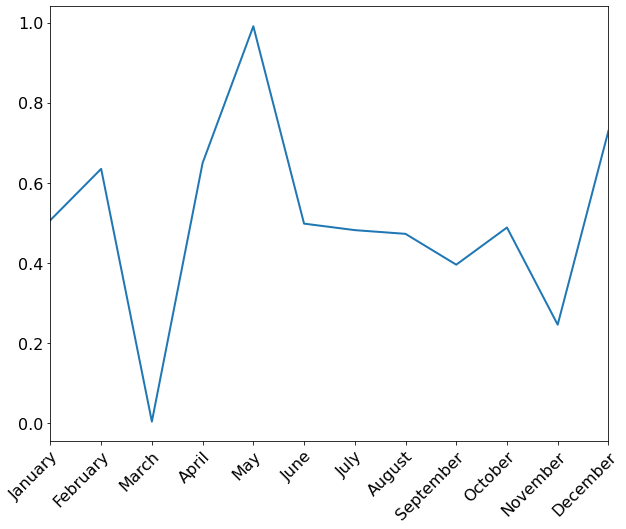

In [25]:
rng = np.random.default_rng()
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.plot(np.arange(12), rng.random(12))
plt.xticks(np.arange(12), months, rotation=45, rotation_mode='anchor', ha='right', va='top')
plt.xlim(0, 11)

# Histogramme
Sehr häufig braucht man Histogramme.

(array([  7.,  12.,  66., 128., 199., 268., 194.,  89.,  30.,   7.]),
 array([-3.40117519, -2.75165072, -2.10212624, -1.45260177, -0.8030773 ,
        -0.15355282,  0.49597165,  1.14549613,  1.7950206 ,  2.44454507,
         3.09406955]),
 <BarContainer object of 10 artists>)

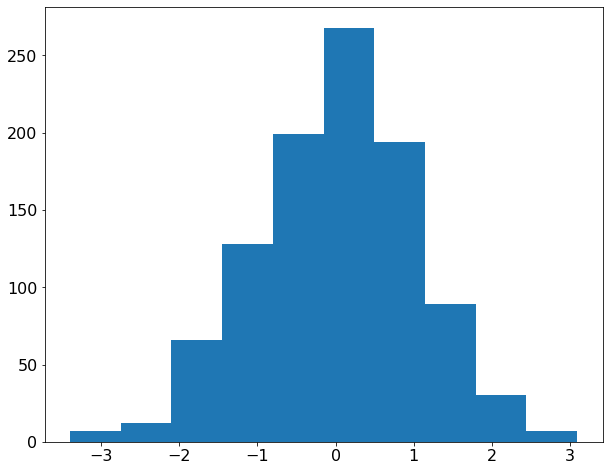

In [26]:
# Zufallsdaten generieren:
rng = np.random.default_rng()
x = rng.normal(0, 1, 1000)
plt.hist(x)
# try histtype='stepfilled'

# Objektorientiertes Plotten
Bis jetzt haben wir die schnelle Variante mit der `pyplot`-Syntax benutzt. Wenn man viele Plots anlegt, ist der objekt-orientierte Ansatz für matplotlib besser geeignet.

(-1.1, 1.1)

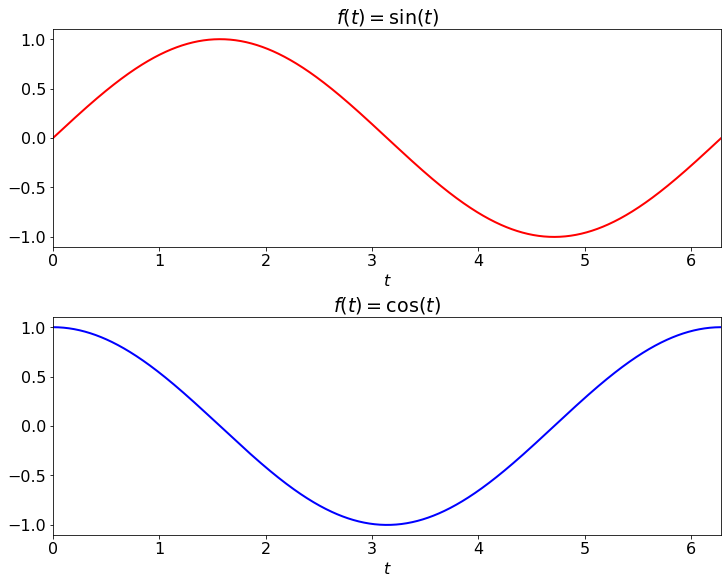

In [30]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2 * np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2 * np.pi)
ax2.set_ylim(-1.1, 1.1)

# 3D Plots

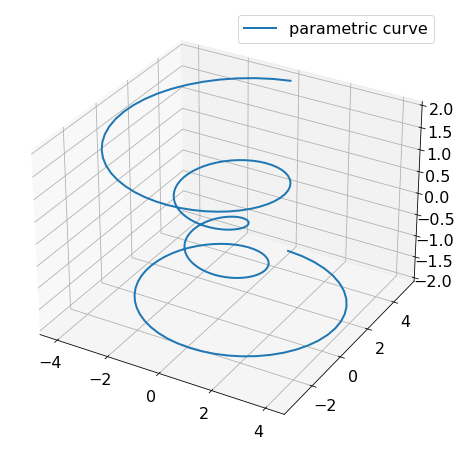

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 200)
z = np.linspace(-2, 2, 200)

r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

Weitere Beispiele zum 3dim Plotten findet ihr hier:

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

<h1> LaTeX </h1>
<b1> Es ist auch möglich LaTeX für das Setzen aller Plot-Beschriftungen (d.h. Achsenbeschriftungen, Ticks, Legenden, usw.) zu verwenden. Seht Euch dazu die "TeX in matplotlib" Folien an. </b1>